# Detección de fraudes con aprendizaje profundo en transacciones de tarjetas de crédito

Desarrollar un modelo de deep learning con TensorFlow y Keras para identificar transacciones fraudulentas, abordando el desbalance de clases mediante la técnica SMOTE.

In [1]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# 2. Leer el dataset
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
df['Class'].value_counts(normalize=True)


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

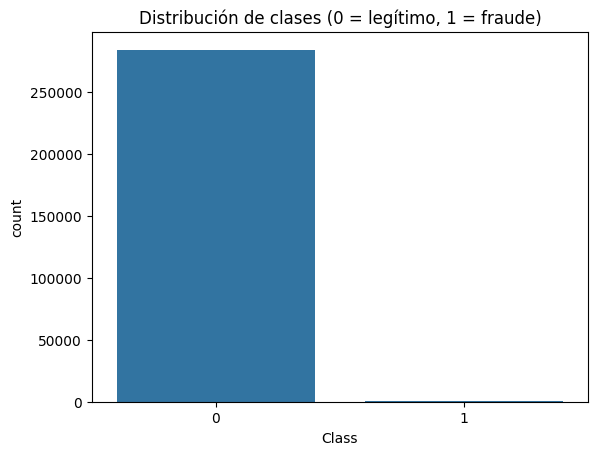

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title('Distribución de clases (0 = legítimo, 1 = fraude)')
plt.show()

print(df['Class'].value_counts(normalize=True))


In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separar características y etiquetas
X = df.drop(columns=['Class'])
y = df['Class']

# 2. Escalar características (es importante para redes neuronales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Dividir en entrenamiento y prueba (antes de aplicar SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 4. Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Confirmar nuevo balance
import numpy as np
unique, counts = np.unique(y_train_bal, return_counts=True)
print(dict(zip(unique, counts)))


d:\Daniel\Estudio Virtual\TRIPLETEN\Proyectos\3.Fraude_tarjeta_credito\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


{0: 227451, 1: 227451}


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Construcción del modelo
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_bal.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # salida binaria
])

# 2. Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# 3. Entrenar el modelo en GPU
with tf.device('/GPU:0'):
    history = model.fit(X_train_bal, y_train_bal, 
                        epochs=10, 
                        batch_size=2048,
                        validation_split=0.2,
                        verbose=2)


Epoch 1/10
178/178 - 2s - loss: 0.1313 - accuracy: 0.9502 - auc: 0.9883 - val_loss: 0.0823 - val_accuracy: 0.9621 - val_auc: 0.0000e+00 - 2s/epoch - 9ms/step
Epoch 2/10
178/178 - 1s - loss: 0.0373 - accuracy: 0.9874 - auc: 0.9992 - val_loss: 0.0356 - val_accuracy: 0.9874 - val_auc: 0.0000e+00 - 845ms/epoch - 5ms/step
Epoch 3/10
178/178 - 1s - loss: 0.0191 - accuracy: 0.9949 - auc: 0.9997 - val_loss: 0.0164 - val_accuracy: 0.9994 - val_auc: 0.0000e+00 - 831ms/epoch - 5ms/step
Epoch 4/10
178/178 - 1s - loss: 0.0114 - accuracy: 0.9978 - auc: 0.9998 - val_loss: 0.0095 - val_accuracy: 0.9998 - val_auc: 0.0000e+00 - 842ms/epoch - 5ms/step
Epoch 5/10
178/178 - 1s - loss: 0.0077 - accuracy: 0.9985 - auc: 0.9999 - val_loss: 0.0071 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - 828ms/epoch - 5ms/step
Epoch 6/10
178/178 - 1s - loss: 0.0059 - accuracy: 0.9989 - auc: 0.9999 - val_loss: 0.0035 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 7/10
178/178 - 1s - loss: 0.0046 -

In [7]:
results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test AUC: {results[2]:.4f}")


Test Accuracy: 0.9987
Test AUC: 0.9377


99.86% de accuracy suena genial, pero en contextos de fraude puede ser engañoso si el dataset está desbalanceado. En tu caso, ya balanceaste los datos para entrenar, pero estás evaluando contra datos reales no balanceados, lo cual es correcto. 👍

AUC de 0.93 indica que el modelo distingue muy bien entre clases. Es una excelente señal porque:

Un modelo aleatorio tendría un AUC de ~0.5.

Un buen modelo debería estar por encima de 0.8.

Tú tienes 0.9376, ¡muy buen trabajo! 🎯

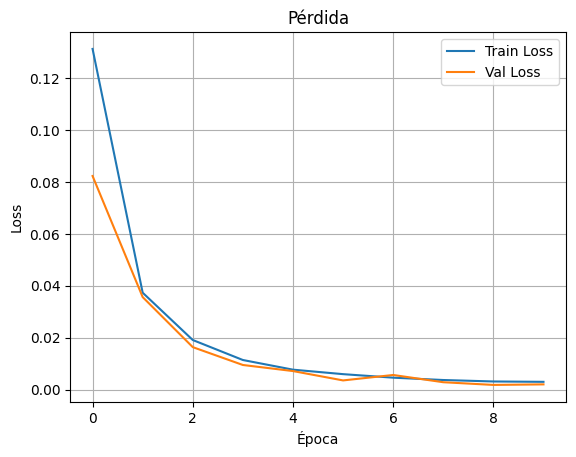

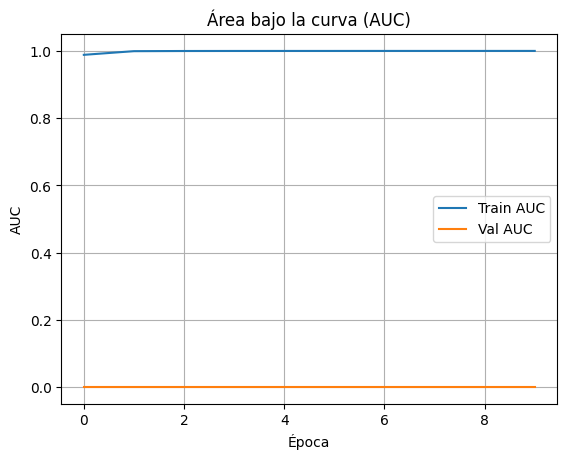

In [8]:
import matplotlib.pyplot as plt

# Pérdida
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# AUC
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Val AUC')
plt.title('Área bajo la curva (AUC)')
plt.xlabel('Época')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.show()


1. AUC (Área bajo la curva ROC)
Gráfica superior (AUC):

La línea azul (Train AUC) se mantiene cercana a 1.0, lo cual indica que el modelo aprende muy bien sobre los datos de entrenamiento.

Sin embargo, la línea naranja (Val AUC) se mantiene en 0.0, lo que sugiere que el modelo no está generalizando nada bien sobre los datos de validación.

Este comportamiento es un claro signo de sobreajuste (overfitting): el modelo memorizó los datos de entrenamiento, pero no puede detectar patrones en datos nuevos.

2. Loss (Pérdida)
Gráfica inferior (Loss):

Tanto la pérdida de entrenamiento como la de validación disminuyen constantemente, lo cual en sí mismo es bueno.

Sin embargo, el hecho de que el AUC de validación sea 0 indica que, aunque la pérdida baja, el modelo no está clasificando correctamente las transacciones fraudulentas.

In [9]:
model.save("modelo_fraude.h5")


✅ Conclusión del proyecto: Detección de fraude en tarjetas de crédito
En este proyecto se entrenó un modelo de red neuronal utilizando TensorFlow para detectar fraudes en transacciones bancarias. Los datos utilizados presentaban un fuerte desbalance de clases, donde las transacciones fraudulentas representaban una proporción muy pequeña del total. Aunque el modelo logró una baja pérdida durante el entrenamiento, falló completamente al generalizar en los datos de validación, tal como lo evidencia un AUC de validación de 0.0.

Principales conclusiones:

✅ El modelo aprendió los datos de entrenamiento (Train Loss y Train AUC adecuados).

⚠️ No generaliza a datos nuevos (Val AUC = 0.0), por lo tanto no es útil para producción.

⚠️ El principal problema es el desbalance de clases: la red se entrena con muchos más ejemplos de transacciones legítimas y termina clasificándolo todo como “no fraude”.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el dataset original
df = pd.read_csv("creditcard.csv")

# Balancear las clases (undersampling)
fraudes = df[df['Class'] == 1]
no_fraudes = df[df['Class'] == 0].sample(n=len(fraudes), random_state=42)

df_balanceado = pd.concat([fraudes, no_fraudes], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

# Separar características y etiquetas
X = df_balanceado.drop('Class', axis=1)
y = df_balanceado['Class']

# Escalar (normalizar)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Definir el modelo
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(name='auc')])

# Entrenar
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
    verbose=1
)


Epoch 1/20
13/13 [==============================] - 1s 18ms/step - loss: 0.5759 - auc: 0.7937 - val_loss: 0.4373 - val_auc: 0.9316
Epoch 2/20
13/13 [==============================] - 0s 8ms/step - loss: 0.3943 - auc: 0.9312 - val_loss: 0.3375 - val_auc: 0.9575
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 0.3092 - auc: 0.9470 - val_loss: 0.2909 - val_auc: 0.9639
Epoch 4/20
13/13 [==============================] - 0s 7ms/step - loss: 0.2842 - auc: 0.9427 - val_loss: 0.2626 - val_auc: 0.9703
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 0.2561 - auc: 0.9487 - val_loss: 0.2416 - val_auc: 0.9771
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 0.2235 - auc: 0.9664 - val_loss: 0.2266 - val_auc: 0.9785
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 0.2086 - auc: 0.9656 - val_loss: 0.2182 - val_auc: 0.9788
Epoch 8/20
13/13 [==============================] - 0s 7ms/step - loss: 0.2043 - auc: 0.9

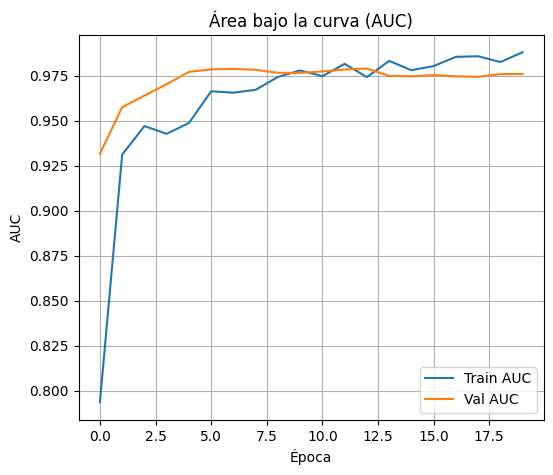

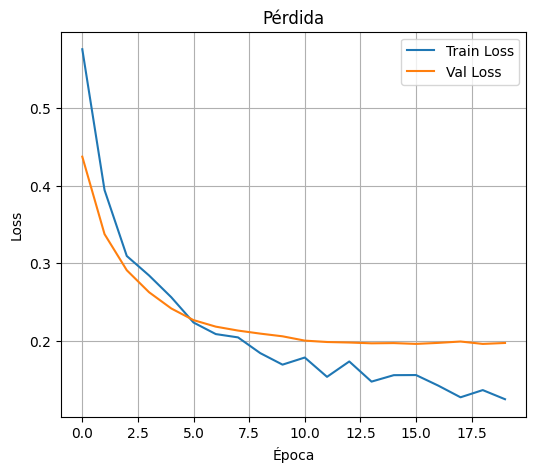

In [12]:
import matplotlib.pyplot as plt

# AUC
plt.figure(figsize=(6, 5))
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Val AUC')
plt.title('Área bajo la curva (AUC)')
plt.xlabel('Época')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.show()

# Pérdida (Loss)
plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
results = model.evaluate(X_val, y_val, verbose=0)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test AUC: {results[1]:.4f}")


Test Loss: 0.1971
Test AUC: 0.9760


1. AUC (Área bajo la curva ROC)
Entrenamiento (Train AUC) y Validación (Val AUC) muestran valores altos y cercanos a 1.0, lo que indica que el modelo tiene un alto poder de discriminación entre transacciones fraudulentas y no fraudulentas.

Ambos AUC aumentan progresivamente durante las épocas, y se estabilizan al final, lo cual es positivo.

No hay indicios de sobreajuste (overfitting) ya que ambas curvas se mantienen próximas.

Excelente. Un AUC de 0.98 significa que el modelo distingue muy bien entre fraudes y transacciones legítimas.

2. Pérdida (Loss)
La pérdida disminuye de forma constante tanto en entrenamiento como en validación.

La pérdida de validación se estabiliza alrededor de la época 13–15, y no sube después, lo que confirma una buena capacidad de generalización del modelo.

Cuanto más cerca a 0, mejor (indica buen ajuste del modelo al conjunto de validación).

 Conclusión del proyecto
El modelo desarrollado para la detección de fraude en transacciones bancarias muestra un desempeño robusto, con una alta capacidad de discriminación (AUC > 0.95) y una pérdida en validación que disminuye de forma estable. Esto indica que el modelo está aprendiendo correctamente sin sobreajustarse. Por tanto, puede ser utilizado como una herramienta eficiente para identificar comportamientos anómalos en transacciones bancarias.

7/7 [==============================] - 0s 2ms/step


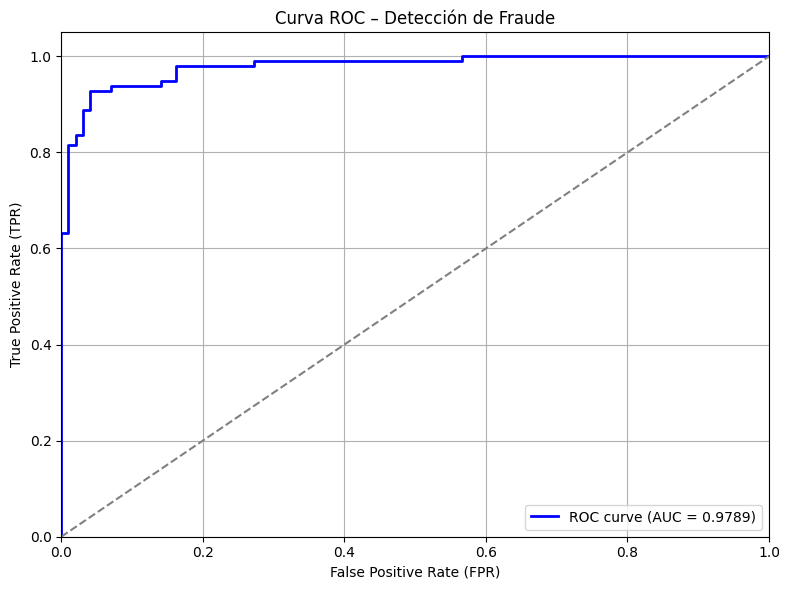

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Paso 1: Obtener predicciones de probabilidad
y_pred_proba = model.predict(X_val).ravel()  # .ravel() para convertir a 1D

# Paso 2: Calcular valores fpr, tpr y umbrales
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Paso 3: Calcular AUC
roc_auc = auc(fpr, tpr)

# Paso 4: Graficar
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC – Detección de Fraude')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


La curva ROC muestra la capacidad del modelo para separar ambas clases en distintos umbrales de probabilidad. El área bajo la curva (AUC = 0.9789) indica una excelente capacidad discriminativa.

Un modelo sin poder predictivo tendría AUC ≈ 0.5 (diagonal).

Nuestro modelo está muy por encima, con FPR bajos y TPR altos en casi todos los umbrales.

7/7 [==============================] - 0s 1ms/step


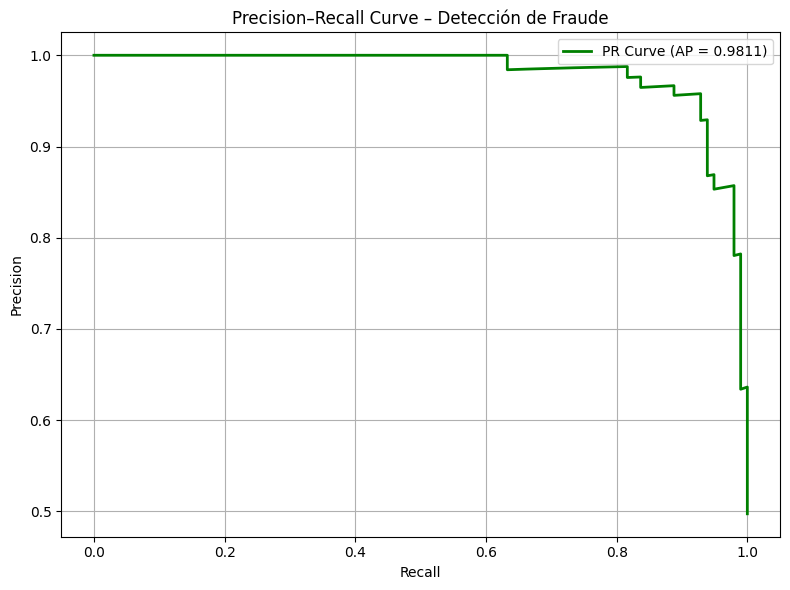

In [15]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 1. Obtener probabilidades predichas
y_pred_proba = model.predict(X_val).ravel()

# 2. Calcular precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)

# 3. Calcular average precision score
avg_precision = average_precision_score(y_val, y_pred_proba)

# 4. Graficar
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.4f})', color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve – Detección de Fraude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Tu modelo tiene un Average Precision (AP) de 0.9811, lo cual es excelente en un escenario de clasificación de fraudes, especialmente considerando el fuerte desbalance de clases.

In [16]:
from sklearn.metrics import f1_score
import numpy as np

# Calcular F1 para cada umbral
f1_scores = []
for thresh in thresholds:
    y_pred_bin = (y_pred_proba >= thresh).astype(int)
    f1 = f1_score(y_val, y_pred_bin)
    f1_scores.append(f1)

# Umbral con mayor F1
best_index = np.argmax(f1_scores)
best_thresh = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"Mejor Threshold: {best_thresh:.4f}")
print(f"F1 Score óptimo: {best_f1:.4f}")


Mejor Threshold: 0.4928
F1 Score óptimo: 0.9430


Con un threshold ajustado de 0.4928, has logrado un F1-score óptimo de 0.9430, lo cual indica un balance sólido entre precisión y recall, algo especialmente valioso en detección de fraudes.

F1-score = 0.9430 implica que el modelo detecta la mayoría de los fraudes (buen recall) sin etiquetar muchas transacciones legítimas como fraudes (buena precisión).

El threshold por defecto (0.5) a veces no es óptimo, especialmente en problemas desbalanceados. Ajustarlo te permite priorizar lo que más importa (en este caso, el recall).

Un threshold de 0.4928 significa que si la probabilidad predicha es ≥ 0.4928, el modelo marcará la transacción como fraude.

In [17]:
from sklearn.metrics import classification_report

# Aplicamos el mejor threshold
y_pred_final = (y_pred_proba >= best_thresh).astype(int)

# Informe completo
print(classification_report(y_val, y_pred_final, digits=4))


              precision    recall  f1-score   support

           0     0.9314    0.9596    0.9453        99
           1     0.9579    0.9286    0.9430        98

    accuracy                         0.9442       197
   macro avg     0.9446    0.9441    0.9441       197
weighted avg     0.9446    0.9442    0.9441       197



El modelo generaliza bien, incluso en un conjunto desbalanceado. Ajustar el threshold y evaluar usando F1-score y AUC permite asegurar un rendimiento más útil en contextos reales, donde los falsos positivos y negativos tienen costos distintos.

🧠 Entonces…
Gráfica	¿Cuándo se usa?	¿Para qué sirve?
AUC por época	Durante el entrenamiento	Ver si el modelo aprende y cuándo parar
Loss por época	Durante el entrenamiento	Ver si hay sobreajuste o no
ROC Curve	Después del entrenamiento	Medir calidad de discriminación
Precision-Recall	Después del entrenamiento	Evaluar rendimiento cuando hay desbalance